In [1]:
import tensorflow as tf

## create a graph
g = tf.Graph()
with g.as_default():
    x = tf.placeholder(dtype=tf.float32,
                       shape=(None), name='x')
    w = tf.Variable(2.0, name='weight')
    b = tf.Variable(0.7, name='bias')

    z = w*x + b
    init = tf.global_variables_initializer()

## create a session and pass in graph g
with tf.Session(graph=g) as sess:
    ## initialize w and b:
    sess.run(init)
    ## evaluate z:
    for t in [1.0, 0.6, -1.8]:
        print('x=%4.1f --> z=%4.1f'%(
              t, sess.run(z, feed_dict={x:t})))

x= 1.0 --> z= 2.7
x= 0.6 --> z= 1.9
x=-1.8 --> z=-2.9


In [2]:
with tf.Session(graph=g) as sess:
    sess.run(init)
    print(sess.run(z, feed_dict={x:[1., 2., 3.]}))

[2.7 4.7 6.7]


In [3]:
import tensorflow as tf
import numpy as np


g = tf.Graph()
with g.as_default():
    x = tf.placeholder(dtype=tf.float32, 
                       shape=(None, 2, 3),
                       name='input_x')

    x2 = tf.reshape(x, shape=(-1, 6),
                    name='x2')

    ## calculate the sum of each column
    xsum = tf.reduce_sum(x2, axis=0, name='col_sum')

    ## calculate the mean of each column
    xmean = tf.reduce_mean(x2, axis=0, name='col_mean')

    
with tf.Session(graph=g) as sess:
    x_array = np.arange(18).reshape(3, 2, 3)
    print('input shape: ', x_array.shape)
    print('Reshaped:\n', 
          sess.run(x2, feed_dict={x:x_array}))
    print('Column Sums:\n', 
          sess.run(xsum, feed_dict={x:x_array}))
    print('Column Means:\n', 
          sess.run(xmean, feed_dict={x:x_array}))

input shape:  (3, 2, 3)
Reshaped:
 [[ 0.  1.  2.  3.  4.  5.]
 [ 6.  7.  8.  9. 10. 11.]
 [12. 13. 14. 15. 16. 17.]]
Column Sums:
 [18. 21. 24. 27. 30. 33.]
Column Means:
 [ 6.  7.  8.  9. 10. 11.]


In [0]:
import tensorflow as tf
import numpy as np
 
X_train = np.arange(10).reshape((10, 1))
y_train = np.array([1.0, 1.3, 3.1,
                    2.0, 5.0, 6.3, 
                    6.6, 7.4, 8.0, 
                    9.0])

In [0]:
class TfLinreg(object):
    
    def __init__(self, x_dim, learning_rate=0.01,
                 random_seed=None):
        self.x_dim = x_dim
        self.learning_rate = learning_rate
        self.g = tf.Graph()
        ## build the model
        with self.g.as_default():
            ## set graph-level random-seed
            tf.set_random_seed(random_seed)
            
            self.build()
            ## create initializer
            self.init_op = tf.global_variables_initializer()
        
    def build(self):
        ## define placeholders for inputs
        self.X = tf.placeholder(dtype=tf.float32,
                                shape=(None, self.x_dim),
                                name='x_input')
        self.y = tf.placeholder(dtype=tf.float32,
                                shape=(None),
                                name='y_input')
        print(self.X)
        print(self.y)
        ## define weight matrix and bias vector
        w = tf.Variable(tf.zeros(shape=(1)),
                        name='weight')
        b = tf.Variable(tf.zeros(shape=(1)), 
                        name="bias")
        print(w)
        print(b)

        self.z_net = tf.squeeze(w*self.X + b,
                                name='z_net')
        print(self.z_net)
        
        sqr_errors = tf.square(self.y - self.z_net, 
                               name='sqr_errors')
        print(sqr_errors)
        self.mean_cost = tf.reduce_mean(sqr_errors,
                                        name='mean_cost')
        
        optimizer = tf.train.GradientDescentOptimizer(
                    learning_rate=self.learning_rate, 
                    name='GradientDescent')
        self.optimizer = optimizer.minimize(self.mean_cost)

In [6]:
lrmodel = TfLinreg(x_dim=X_train.shape[1], learning_rate=0.01)

Tensor("x_input:0", shape=(?, 1), dtype=float32)
Tensor("y_input:0", dtype=float32)
<tf.Variable 'weight:0' shape=(1,) dtype=float32_ref>
<tf.Variable 'bias:0' shape=(1,) dtype=float32_ref>
Tensor("z_net:0", dtype=float32)
Tensor("sqr_errors:0", dtype=float32)


In [0]:
def train_linreg(sess, model, X_train, y_train, num_epochs=10):
    ## initialiaze all variables: W & b
    sess.run(model.init_op)
    
    training_costs = []
    for i in range(num_epochs):
        _, cost = sess.run([model.optimizer, model.mean_cost], 
                           feed_dict={model.X:X_train, 
                                      model.y:y_train})
        training_costs.append(cost)
        
    return training_costs

In [0]:
sess = tf.Session(graph=lrmodel.g)
training_costs = train_linreg(sess, lrmodel, X_train, y_train)

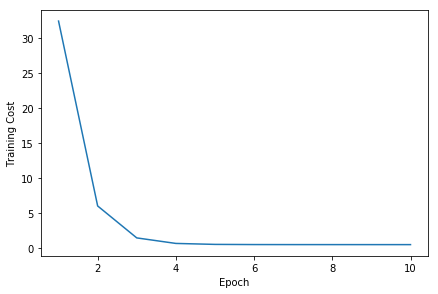

In [9]:
import matplotlib.pyplot as plt

plt.plot(range(1,len(training_costs) + 1), training_costs)
plt.tight_layout()
plt.xlabel('Epoch')
plt.ylabel('Training Cost')
plt.show()

In [0]:
def predict_linreg(sess, model, X_test):
    y_pred = sess.run(model.z_net, 
                      feed_dict={model.X:X_test})
    return y_pred

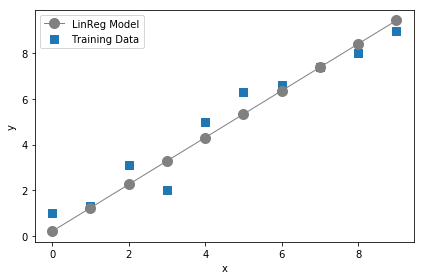

In [14]:
plt.scatter(X_train, y_train,
            marker='s', s=50,
            label='Training Data')
plt.plot(range(X_train.shape[0]), 
         predict_linreg(sess, lrmodel, X_train),
         color='gray', marker='o', 
         markersize=10, linewidth=1,
         label='LinReg Model')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.tight_layout()
plt.show()

In [17]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('C:/Users/Svitlana', one_hot=True)


W0808 18:43:10.547390 139726750414720 deprecation.py:323] From <ipython-input-17-9a82ca98995c>:2: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0808 18:43:10.549406 139726750414720 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0808 18:43:10.554818 139726750414720 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/base.py:252: _internal_retry.<locals>.wrap.<locals>.wrapped_fn (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be remove

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting C:/Users/Svitlana/train-images-idx3-ubyte.gz


W0808 18:43:10.944305 139726750414720 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0808 18:43:10.947067 139726750414720 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.
W0808 18:43:11.041656 139726750414720 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be remove

Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting C:/Users/Svitlana/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting C:/Users/Svitlana/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting C:/Users/Svitlana/t10k-labels-idx1-ubyte.gz


In [21]:
image_size = 28
labels_size = 10
learning_rate = 0.05
steps_number = 1000
batch_size = 100

training_data = tf.placeholder(tf.float32, [None, image_size*image_size])
labels = tf.placeholder(tf.float32, [None, labels_size])

# Variables to be tuned
W = tf.Variable(tf.truncated_normal([image_size*image_size, labels_size], stddev=0.1))
b = tf.Variable(tf.constant(0.1, shape=[labels_size]))

# Build the network (only output layer)
output = tf.matmul(training_data, W) + b

# Define the loss function
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=labels, logits=output))

# Training step
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

# Accuracy calculation
correct_prediction = tf.equal(tf.argmax(output, 1), tf.argmax(labels, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Run the training
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())


for i in range(steps_number):
  # Get the next batch
  input_batch, labels_batch = mnist.train.next_batch(batch_size)
  feed_dict = {training_data: input_batch, labels: labels_batch}

  # Run the training step
  train_step.run(feed_dict=feed_dict)

  # Print the accuracy progress on the batch every 100 steps
  if i%100 == 0:
    train_accuracy = accuracy.eval(feed_dict=feed_dict)
    print("Step %d, training batch accuracy %g %%"%(i, train_accuracy*100))
    
# Evaluate on the test set
test_accuracy = accuracy.eval(feed_dict={training_data: mnist.test.images, labels: mnist.test.labels})
print("Test accuracy: %g %%"%(test_accuracy*100))    



W0808 18:49:37.795450 139726750414720 deprecation.py:323] From <ipython-input-21-42fedaaef333>:18: softmax_cross_entropy_with_logits (from tensorflow.python.ops.nn_ops) is deprecated and will be removed in a future version.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



Step 0, training batch accuracy 4 %
Step 100, training batch accuracy 85 %
Step 200, training batch accuracy 85 %
Step 300, training batch accuracy 89 %
Step 400, training batch accuracy 83 %
Step 500, training batch accuracy 92 %
Step 600, training batch accuracy 86 %
Step 700, training batch accuracy 94 %
Step 800, training batch accuracy 92 %
Step 900, training batch accuracy 92 %
Test accuracy: 90.01 %


In [22]:
n_features = mnist.train.images.shape[1]
n_classes = 10
random_seed = 123
np.random.seed(random_seed)

g = tf.Graph()
with g.as_default():
    tf.set_random_seed(random_seed)
    tf_x = tf.placeholder(dtype=tf.float32,
                       shape=(None, n_features),
                       name='tf_x')

    tf_y = tf.placeholder(dtype=tf.int32, 
                        shape=None, name='tf_y')
    y_onehot = tf.one_hot(indices=tf_y, depth=n_classes)

    h1 = tf.layers.dense(inputs=tf_x, units=50,
                         activation=tf.tanh,
                         name='layer1')

    h2 = tf.layers.dense(inputs=h1, units=50,
                         activation=tf.tanh,
                         name='layer2')

    logits = tf.layers.dense(inputs=h2, 
                             units=10,
                             activation=None,
                             name='layer3')

    predictions = {
        'classes' : tf.argmax(logits, axis=1, 
                              name='predicted_classes'),
        'probabilities' : tf.nn.softmax(logits, 
                              name='softmax_tensor')
    }

W0808 18:51:49.821518 139726750414720 deprecation.py:323] From <ipython-input-22-baa7236c528e>:19: dense (from tensorflow.python.layers.core) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.dense instead.
W0808 18:51:49.829909 139726750414720 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [23]:
with g.as_default():
    cost = tf.losses.softmax_cross_entropy(
            onehot_labels=y_onehot, logits=logits)

    optimizer = tf.train.GradientDescentOptimizer(
            learning_rate=0.001)

    train_op = optimizer.minimize(loss=cost)

    init_op = tf.global_variables_initializer()

W0808 18:52:14.622904 139726750414720 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/losses/losses_impl.py:121: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
def create_batch_generator(X, y, batch_size=128, shuffle=False):
    X_copy = np.array(X)
    y_copy = np.array(y)
    
    if shuffle:
        data = np.column_stack((X_copy, y_copy))
        np.random.shuffle(data)
        X_copy = data[:, :-1]
        y_copy = data[:, -1].astype(int)
    
    for i in range(0, X.shape[0], batch_size):
        yield (X_copy[i:i+batch_size, :], y_copy[i:i+batch_size])

In [37]:
lbl = np.argmax(mnist.train.labels, axis=1)
## create a session to launch the graph
sess =  tf.Session(graph=g)
## run the variable initialization operator
sess.run(init_op)

## 50 epochs of training:
training_costs = []
for epoch in range(50):
    training_loss = []
    batch_generator = create_batch_generator(
            mnist.train.images, lbl, 
            batch_size=64)
    for batch_X, batch_y in batch_generator:
        ## prepare a dict to feed data to our network:
        feed = {tf_x:batch_X, tf_y:batch_y}
        _, batch_cost = sess.run([train_op, cost], feed_dict=feed)
        training_costs.append(batch_cost)
    print(' -- Epoch %2d  '
          'Avg. Training Loss: %.4f' % (
              epoch+1, np.mean(training_costs)
    ))

 -- Epoch  1  Avg. Training Loss: 1.9882
 -- Epoch  2  Avg. Training Loss: 1.7010
 -- Epoch  3  Avg. Training Loss: 1.5058
 -- Epoch  4  Avg. Training Loss: 1.3647
 -- Epoch  5  Avg. Training Loss: 1.2569
 -- Epoch  6  Avg. Training Loss: 1.1712
 -- Epoch  7  Avg. Training Loss: 1.1011
 -- Epoch  8  Avg. Training Loss: 1.0423
 -- Epoch  9  Avg. Training Loss: 0.9922
 -- Epoch 10  Avg. Training Loss: 0.9489
 -- Epoch 11  Avg. Training Loss: 0.9110
 -- Epoch 12  Avg. Training Loss: 0.8775
 -- Epoch 13  Avg. Training Loss: 0.8476
 -- Epoch 14  Avg. Training Loss: 0.8208
 -- Epoch 15  Avg. Training Loss: 0.7965
 -- Epoch 16  Avg. Training Loss: 0.7745
 -- Epoch 17  Avg. Training Loss: 0.7543
 -- Epoch 18  Avg. Training Loss: 0.7358
 -- Epoch 19  Avg. Training Loss: 0.7187
 -- Epoch 20  Avg. Training Loss: 0.7029
 -- Epoch 21  Avg. Training Loss: 0.6882
 -- Epoch 22  Avg. Training Loss: 0.6745
 -- Epoch 23  Avg. Training Loss: 0.6617
 -- Epoch 24  Avg. Training Loss: 0.6498
 -- Epoch 25  Av

In [40]:
## do prediction on the test set:
feed = {tf_x : mnist.test.images}
y_pred = sess.run(predictions['classes'], 
                  feed_dict=feed)
 
print('Test Accuracy: %.2f%%' % (
      100*np.sum(y_pred == np.argmax(mnist.test.labels, axis=1))/np.argmax(mnist.test.labels, axis=1).shape[0]))

Test Accuracy: 92.24%
